<a id='toc'/>

# Table of content

1. [Loading packages](#loading-packages)
2. [Loading Data](#2-loading-data)
3. [EDA (Technical analysis)](#eda_technical)
4. [EDA (Information analysis)](#eda_information)
5. [Train Test Split](#train_test_split)
6. [Dummy Model](#dummy_model)
7. [Preprocessing Pipeline](#pipeline)
8. [Evaluation](#evaluation)
   * [Performance comparison for Case and Method](#ca_comparison)
   * [Performance comparison for models](#model_comparison)
9. [Cross Validation](#cross_validation)
10. [Grid Search](#gridsearch)

<a id='loading_packages'/>

# 1. Loading packages
[TOC](#toc)

In [1]:
# dataframe and plotting
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.dummy import DummyClassifier

# Matrix
# from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, ConfusionMatrixDisplay, roc_auc_score, roc_curve, auc, RocCurveDisplay, classification_report
# from sklearn.impute import SimpleImputer, KNNImputer

# Pipeline
from sklearn.preprocessing import KBinsDiscretizer, StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.pipeline import Pipeline as imbpipeline

import warnings
warnings.filterwarnings('ignore')

RSEED = 42

<a id='loading_data'/>

# 2. Loading data
[TOC](#toc)

In [2]:
df = pd.read_csv('data/Train.csv')

In [3]:
df.head().T

,0,1,2,3,4
country,Kenya,Kenya,Kenya,Kenya,Kenya
year,2018,2018,2018,2018,2018
uniqueid,uniqueid_1,uniqueid_2,uniqueid_3,uniqueid_4,uniqueid_5
bank_account,Yes,No,Yes,No,No
location_type,Rural,Rural,Urban,Rural,Urban
cellphone_access,Yes,No,Yes,Yes,No
household_size,3,5,5,5,8
age_of_respondent,24,70,26,34,26
gender_of_respondent,Female,Female,Male,Female,Male
relationship_with_head,Spouse,Head of Household,Other relative,Head of Household,Child


In [4]:
# rename some columns
df.rename(columns={'cellphone_access': 'cellphone', 
                  'age_of_respondent': 'age', 
                  'gender_of_respondent': 'gender', 
                  }, inplace=True)

In [5]:
definition = pd.read_csv('data/VariableDefinitions.csv')
definition

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


<a id='eda_technical'/>

# 3. EDA (technical analysis)
[TOC](#toc)

In [6]:
#shape of our datasets.
print('df data shape :', df.shape)

df data shape : (23524, 13)


In [7]:
#Check missing value
df.isnull().sum().to_frame()

,0
country,0
year,0
uniqueid,0
bank_account,0
location_type,0
cellphone,0
household_size,0
age,0
gender,0
relationship_with_head,0


In [8]:
df.nunique()

country                      4
year                         3
uniqueid                  8735
bank_account                 2
location_type                2
cellphone                    2
household_size              20
age                         85
gender                       2
relationship_with_head       6
marital_status               5
education_level              6
job_type                    10
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone               23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age                     23524 non-null  int64 
 8   gender                  23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [11]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,23524,4,Rwanda,8735,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,23524.0,NaN,NaN,NaN,2016.975939,0.847371,2016.0,2016.0,2017.0,2018.0,2018.0
uniqueid,23524,8735,uniqueid_1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bank_account,23524,2,No,20212,NaN,NaN,NaN,NaN,NaN,NaN,NaN
location_type,23524,2,Rural,14343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cellphone,23524,2,Yes,17454,NaN,NaN,NaN,NaN,NaN,NaN,NaN
household_size,23524.0,NaN,NaN,NaN,3.797483,2.227613,1.0,2.0,3.0,5.0,21.0
age,23524.0,NaN,NaN,NaN,38.80522,16.520569,16.0,26.0,35.0,49.0,100.0
gender,23524,2,Female,13877,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship_with_head,23524,6,Head of Household,12831,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Insights technical analysis
- Row: 3524 
- Columns: 13
- There is no missing values and duplicates
- Only 3 columns (year, household_size, age) are numeric

[TOC](#toc)

<a id='eda_information'/>

# 4. EDA (Information analysis)
[TOC](#toc)

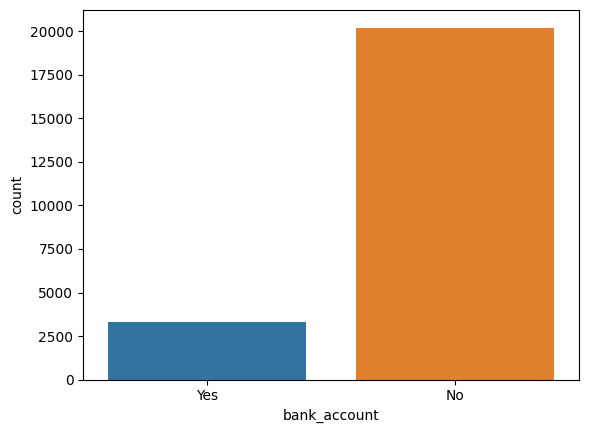

In [14]:
# Check the target variables
sns.countplot(x='bank_account', data=df)
plt.show()

In [17]:
df['relationship_with_head'].value_counts().sort_index()

relationship_with_head
Child                   2229
Head of Household      12831
Other non-relatives      190
Other relative           668
Parent                  1086
Spouse                  6520
Name: count, dtype: int64

In [18]:
df['marital_status'].value_counts().sort_index()

marital_status
Divorced/Seperated          2076
Dont know                      8
Married/Living together    10749
Single/Never Married        7983
Widowed                     2708
Name: count, dtype: int64

In [19]:
df['education_level'].value_counts().sort_index()

education_level
No formal education                 4515
Other/Dont know/RTA                   35
Primary education                  12791
Secondary education                 4223
Tertiary education                  1157
Vocational/Specialised training      803
Name: count, dtype: int64

In [20]:
df['job_type'].value_counts().sort_index()

job_type
Dont Know/Refuse to answer       126
Farming and Fishing             5441
Formally employed Government     387
Formally employed Private       1055
Government Dependent             247
Informally employed             5597
No Income                        627
Other Income                    1080
Remittance Dependent            2527
Self employed                   6437
Name: count, dtype: int64

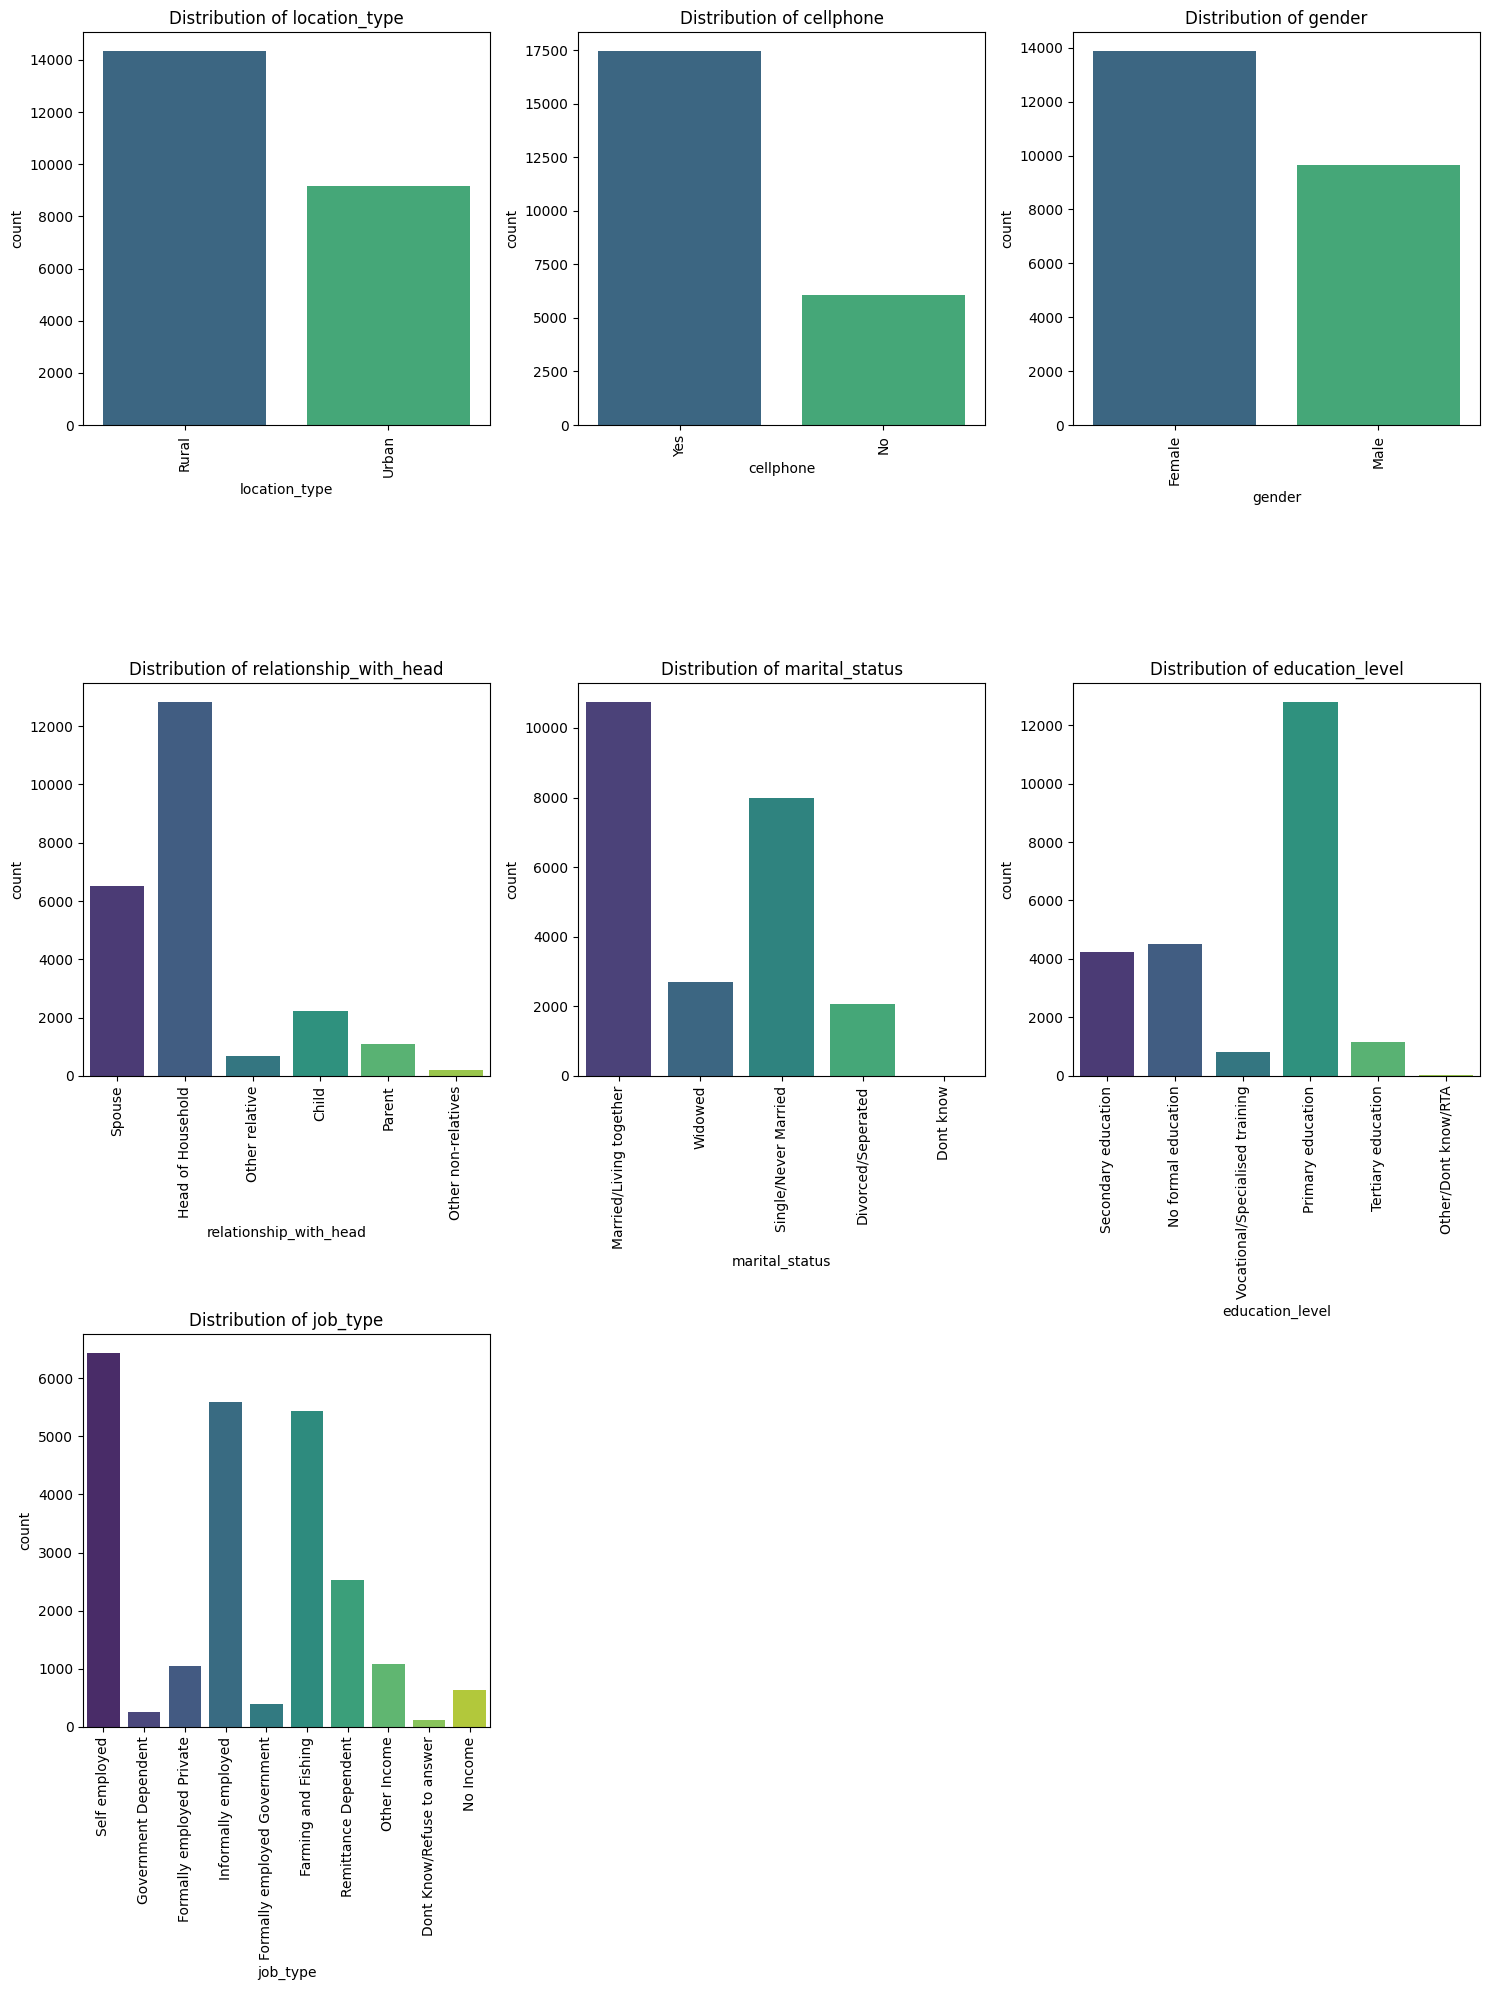

In [21]:
# Selecting categorical variables
categorical_vars = ['location_type', 'cellphone', 'gender', 'relationship_with_head', 'marital_status', 'education_level', 'job_type']

# Setting the chart size
plt.figure(figsize=(15, 20))

# Loop over categorical variables to create subplots
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=var, data=df, palette='viridis')
    plt.title(f'Distribution of {var}')
    plt.xticks(rotation=90)

# Adjusting the layout
plt.tight_layout()
plt.show()

plt.show()

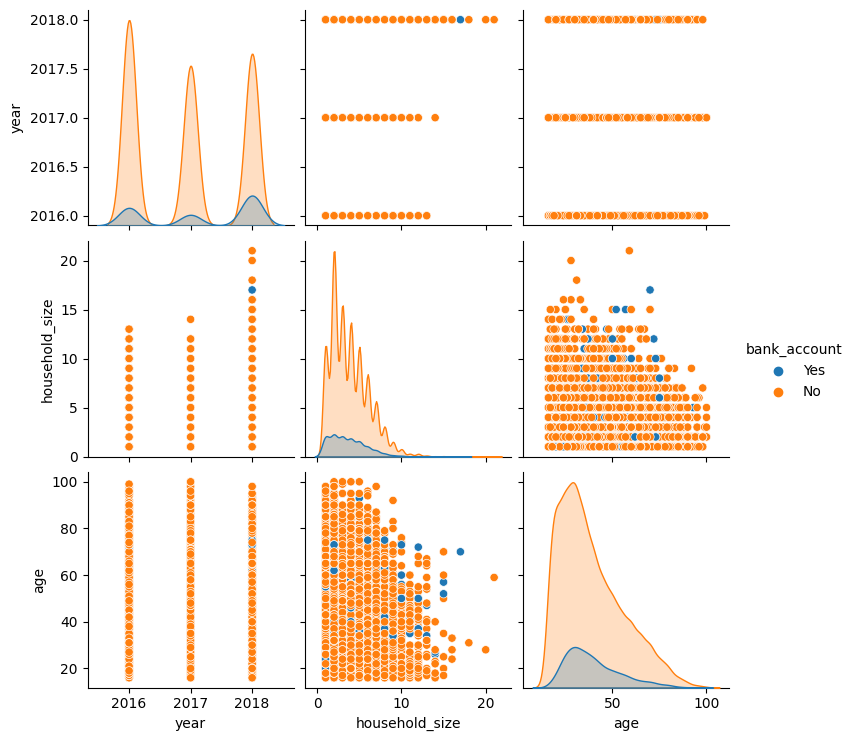

In [133]:
sns.pairplot(df, hue='bank_account')  

### Check Correlation
[TOC](#toc)

In [13]:
df_bak = df.copy()
df_bak.drop('uniqueid', inplace=True, axis=1) 
df_bak.columns

Index(['country', 'year', 'bank_account', 'location_type', 'cellphone',
       'household_size', 'age', 'gender', 'relationship_with_head',
       'marital_status', 'education_level', 'job_type'],
      dtype='object')

In [14]:
le = LabelEncoder()
variables_to_encode = ['country', 'year', 'bank_account', 'location_type', 'cellphone', 'gender', 'relationship_with_head', 'marital_status',  'education_level', 'job_type']
for variable in variables_to_encode:
    df_bak[variable] = le.fit_transform(df_bak[variable])

df_bak.head()

,country,year,bank_account,location_type,cellphone,household_size,age,gender,relationship_with_head,marital_status,education_level,job_type
0,0,2,1,0,1,3,24,0,5,2,3,9
1,0,2,0,0,0,5,70,0,1,4,0,4
2,0,2,1,1,1,5,26,1,3,3,5,9
3,0,2,0,0,1,5,34,0,1,2,2,3
4,0,2,0,1,0,8,26,1,0,3,2,5


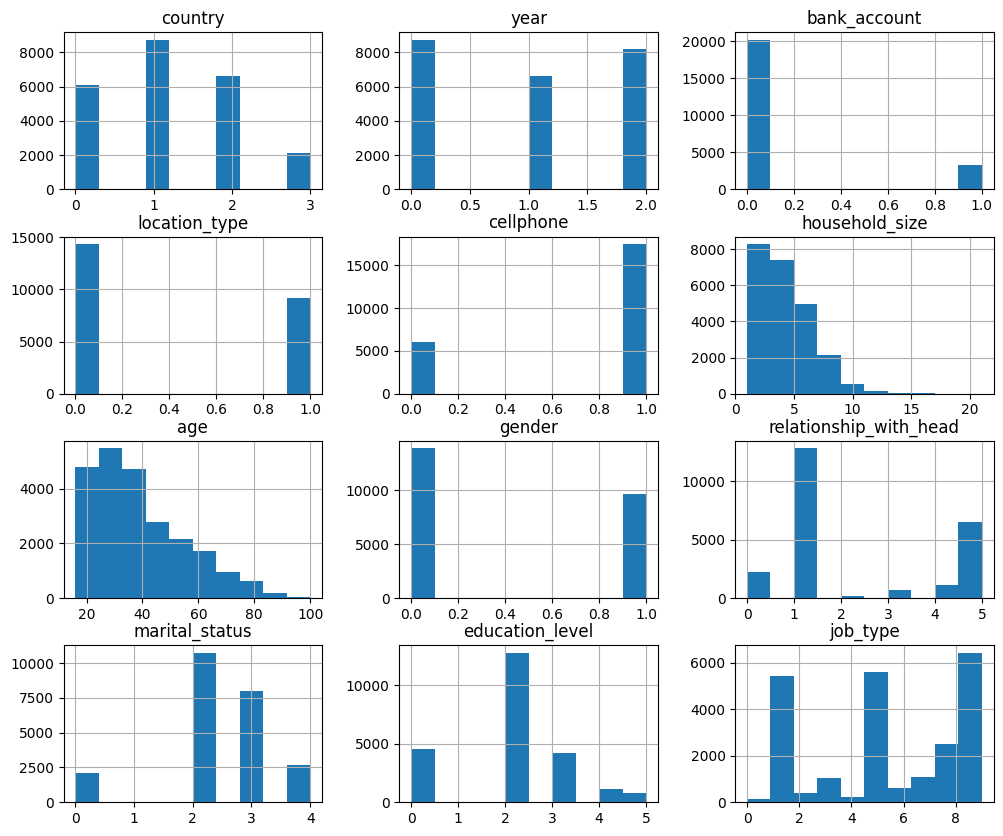

In [482]:
df_bak.hist(figsize=(12,10))
plt.show()

In [31]:
df_bak.corr().round(2)

,country,year,bank_account,location_type,cellphone,household_size,age,gender,relationship_with_head,marital_status,education_level,job_type
country,1.00,-0.09,-0.16,0.15,-0.15,-0.12,-0.06,-0.03,0.13,0.01,-0.05,0.38
year,-0.09,1.00,0.11,0.21,-0.07,-0.05,-0.02,0.00,0.00,-0.03,0.17,0.27
bank_account,-0.16,0.11,1.00,0.09,0.21,-0.03,0.02,0.12,-0.07,-0.04,0.32,-0.06
location_type,0.15,0.21,0.09,1.00,-0.09,-0.26,-0.05,0.01,0.02,0.08,0.13,0.37
cellphone,-0.15,-0.07,0.21,-0.09,1.00,0.09,-0.10,0.10,-0.05,-0.09,0.25,-0.15
household_size,-0.12,-0.05,-0.03,-0.26,0.09,1.00,-0.13,0.01,0.10,-0.13,0.00,-0.16
age,-0.06,-0.02,0.02,-0.05,-0.10,-0.13,1.00,0.01,-0.15,0.22,-0.35,-0.10
gender,-0.03,0.00,0.12,0.01,0.10,0.01,0.01,1.00,-0.47,-0.10,0.12,-0.03
relationship_with_head,0.13,0.00,-0.07,0.02,-0.05,0.10,-0.15,-0.47,1.00,-0.14,-0.02,0.04
marital_status,0.01,-0.03,-0.04,0.08,-0.09,-0.13,0.22,-0.10,-0.14,1.00,-0.12,0.06


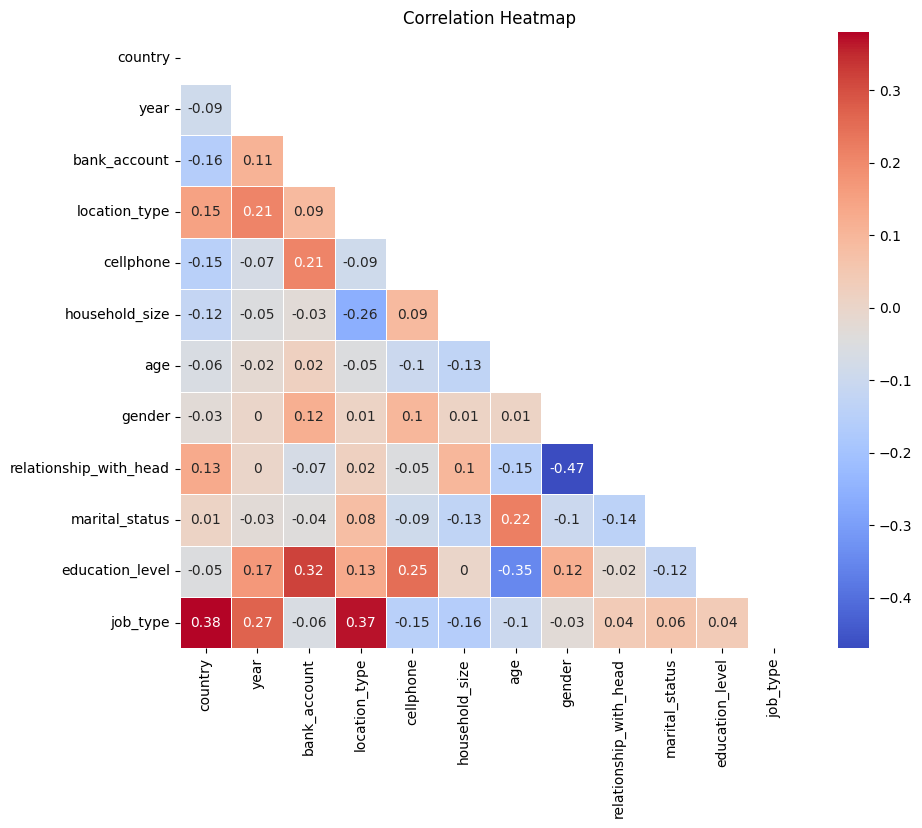

In [34]:
# Create a correlation matrix between the selected columns
correlation_matrix = df_bak.corr().round(2)

# Create a mask to hide the upper triangular portion of the matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set the heatmap size
plt.figure(figsize=(10, 8))

# Create the heatmap with colors
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, mask=mask)

plt.title('Correlation Heatmap')
plt.show()


### Findings
* Almost 85% don't have a bank account (Target data is imbalanced)
* Most of the respondents are from the rural area (+- 60%)
* 74% have cellphone. (In Africa there is a way to transfer money via cellphone without bank account)
* Slightly more than 50% are head of household. Suspect that there are many people that live alone
* 86% of people don't have bank account
* 70% with no education or just primary education


[TOC](#toc)

# Prepare dataset
  **Case 1**: \
  Drop **uniqueid**, **marital_status** and **household_size** since they don't seem to have high correlations. \
  *Keep **age** and **job_type** for experiment
  
[TOC](#toc)

In [431]:
#Dropping the unnecessary columns
data = df.copy()
data.drop(['uniqueid', 'household_size', 'marital_status'], axis=1, inplace=True)
data.columns

Index(['country', 'year', 'bank_account', 'location_type', 'cellphone', 'age',
       'gender', 'relationship_with_head', 'education_level', 'job_type'],
      dtype='object')

#### Mask features in two list: categorical and numerical variables

In [432]:
# categorical mask
cat_mask = data.dtypes == 'object'
cat_mask

country                    True
year                      False
bank_account               True
location_type              True
cellphone                  True
age                       False
gender                     True
relationship_with_head     True
education_level            True
job_type                   True
dtype: bool

In [433]:
data.columns[cat_mask].tolist()

['country',
 'bank_account',
 'location_type',
 'cellphone',
 'gender',
 'relationship_with_head',
 'education_level',
 'job_type']

In [434]:
# mask for categorical predictors/features 
# remove 'bank_account' as it's the target variable
cat_features = data.columns[cat_mask].tolist()
cat_features.remove('bank_account')
cat_features

['country',
 'location_type',
 'cellphone',
 'gender',
 'relationship_with_head',
 'education_level',
 'job_type']

In [435]:
# numeric mask
num_mask = data.dtypes != 'object'
num_mask

country                   False
year                       True
bank_account              False
location_type             False
cellphone                 False
age                        True
gender                    False
relationship_with_head    False
education_level           False
job_type                  False
dtype: bool

In [436]:
num_features = data.columns[num_mask].tolist()
num_features

['year', 'age']

In [437]:
data.loc[:, num_mask]

,year,age
0,2018,24
1,2018,70
2,2018,26
3,2018,34
4,2018,26
...,...,...
23519,2018,48
23520,2018,27
23521,2018,27
23522,2018,30


In [438]:
# convert target variable to numerical data
le = LabelEncoder()
data['bank_account'] = le.fit_transform(data['bank_account'])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   bank_account            23524 non-null  int64 
 3   location_type           23524 non-null  object
 4   cellphone               23524 non-null  object
 5   age                     23524 non-null  int64 
 6   gender                  23524 non-null  object
 7   relationship_with_head  23524 non-null  object
 8   education_level         23524 non-null  object
 9   job_type                23524 non-null  object
dtypes: int64(3), object(7)
memory usage: 1.8+ MB


**Case 2:** \
Limit features

[TOC](#toc)

In [440]:
# Select only necessary columns.
data_limited = df[['bank_account', 
                   'cellphone', 
                   'education_level', 
                  #  'country', 
                  #  'gender'
                   ]].copy()

# categorical mask
cat_mask_2 = data_limited.dtypes == 'object'
cat_features_2 = data_limited.columns[cat_mask_2].tolist()
cat_features_2.remove('bank_account')

#numeric mask
num_mask_2 = data_limited.dtypes != 'object'

# Convert target variable to numerical data
data_limited['bank_account'] = le.fit_transform(data_limited['bank_account'])

print(data_limited.columns)
data_limited.loc[:, cat_features_2]
#data_limited.loc[:, num_features_2]

Index(['bank_account', 'cellphone', 'education_level'], dtype='object')


,cellphone,education_level
0,Yes,Secondary education
1,No,No formal education
2,Yes,Vocational/Specialised training
3,Yes,Primary education
4,No,Primary education
...,...,...
23519,Yes,No formal education
23520,Yes,Secondary education
23521,Yes,Primary education
23522,Yes,Secondary education


<a id='train_test_split'/>

# 5. Train Test Split
[TOC](#toc)

#### Case 1

In [532]:
# Define predictors X (features) and target variable y
X = data.drop('bank_account', axis=1)
y = data['bank_account']

print(f"We have {X.shape[0]} observations in the dataset and {X.shape[1]} features")
print(f"Our target has also {y.shape[0]} values")

# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=RSEED)

We have 23524 observations in the dataset and 9 features
Our target has also 23524 values


#### Case 2

In [445]:
# Define predictors X (features) and target variable y
X_2 = data_limited.drop('bank_account', axis=1)
y_2 = data['bank_account']

print(f"We have {X_2.shape[0]} observations in the dataset and {X_2.shape[1]} features")
print(f"Our target has also {y_2.shape[0]} values")

# Split into train and test set
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, stratify=y, random_state=RSEED)

We have 23524 observations in the dataset and 2 features
Our target has also 23524 values


<a id='dummy_model'/>

## Dummy model as a baseline model
[TOC](#toc)


In [446]:
dummy = DummyClassifier(strategy='stratified', random_state=42)
dummy.fit(X_train, y_train)

DummyClassifier(random_state=42, strategy='stratified')

In [447]:
y_pred_dummy = dummy.predict(X_test)

# Print classification report for the baseline model
print("Classification Report (Baseline Model):")
print(classification_report(y_test, y_pred_dummy))

Classification Report (Baseline Model):
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      6064
           1       0.13      0.13      0.13       994

    accuracy                           0.76      7058
   macro avg       0.49      0.49      0.49      7058
weighted avg       0.75      0.76      0.76      7058



<a id='pipeline'/>

# Preprocessing Pipeline
**Categorical**
  * country: OHE(one-hot-encode)
  * location_type: OHE
  * cellphone: OHE
  * gender: OHE
  * relationship_with_head: OHE
  * education_level: OHE
  * job_type: OHE

**Numerical**
  * year: MinMaxScaler
  * age: MinMaxScaler

**Resampling**
  * Oversampling: SMOTE

[TOC](#toc)

#### Case 1

In [541]:
# Pipeline for numerical features
# Initiating Pipeline and calling one step after another
# each step is built as a list of (name, transform)
# name is the name of the processing step
# transform is an transformation/estimator object (processing step)
num_pipeline = Pipeline([("num_scaler", MinMaxScaler())])
# num_pipeline = Pipeline([("num_scaler", KBinsDiscretizer())])

# Pipeline for categorical features 
cat_pipeline = Pipeline([("ohe", OneHotEncoder())])

# Complete pipeline for numerical and categorical features
# 'ColumnTransformer' applies transformers (num_pipeline/cat_pipeline)
# to specific columns of an array or DataFrame (num_features/cat_features)
preprocessor = ColumnTransformer([
    ("num_processor", num_pipeline, num_features),
    ("cat_processor", cat_pipeline, cat_features)
])
preprocessor

ColumnTransformer(transformers=[('num_processor',
                                 Pipeline(steps=[('num_scaler',
                                                  MinMaxScaler())]),
                                 ['year', 'age']),
                                ('cat_processor',
                                 Pipeline(steps=[('ohe', OneHotEncoder())]),
                                 ['country', 'location_type', 'cellphone',
                                  'gender', 'relationship_with_head',
                                  'education_level', 'job_type'])])

#### Case 2

In [351]:
preprocessor_2 = ColumnTransformer([
    ("cat_processor", OneHotEncoder(), cat_features_2)
])
preprocessor_2

ColumnTransformer(transformers=[('cat_processor', OneHotEncoder(),
                                 ['cellphone', 'education_level', 'country'])])

### Logistic Regression

In [542]:
# case 1
pipeline_model_lg = imbpipeline([('ct', preprocessor),
                                 ('smote', SMOTE(random_state=42)),
                                 ('model', LogisticRegression())
                                 ])

pipeline_model_lg.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('num_processor',
                                                  Pipeline(steps=[('num_scaler',
                                                                   MinMaxScaler())]),
                                                  ['year', 'age']),
                                                 ('cat_processor',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder())]),
                                                  ['country', 'location_type',
                                                   'cellphone', 'gender',
                                                   'relationship_with_head',
                                                   'education_level',
                                                   'job_type'])])),
                ('smote', SMOTE(random_state=42)),
                ('model', LogisticRegression())])

In [543]:
# case 1 with RandomOversampler
pipeline_model_lg_ros = imbpipeline([('ct', preprocessor),
                                 ('ros', RandomOverSampler(sampling_strategy='auto', random_state=42)),
                                 ('model', LogisticRegression())
                                 ])

pipeline_model_lg_ros.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('num_processor',
                                                  Pipeline(steps=[('num_scaler',
                                                                   MinMaxScaler())]),
                                                  ['year', 'age']),
                                                 ('cat_processor',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder())]),
                                                  ['country', 'location_type',
                                                   'cellphone', 'gender',
                                                   'relationship_with_head',
                                                   'education_level',
                                                   'job_type'])])),
                ('ros', RandomOverSampler(random_state=42)),
                ('model', LogisticRegression())])

In [544]:
# case 1 without resampling
pipeline_model_lg_nos = imbpipeline([('ct', preprocessor),
                                 #('smote', SMOTE(random_state=42)),
                                 ('model', LogisticRegression())
                                 ])

pipeline_model_lg_nos.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('num_processor',
                                                  Pipeline(steps=[('num_scaler',
                                                                   MinMaxScaler())]),
                                                  ['year', 'age']),
                                                 ('cat_processor',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder())]),
                                                  ['country', 'location_type',
                                                   'cellphone', 'gender',
                                                   'relationship_with_head',
                                                   'education_level',
                                                   'job_type'])])),
                ('model', LogisticRegression())])

In [453]:
# case 2
pipeline_model_lg_2 = imbpipeline([('ct', preprocessor_2),
                                 ('smote', SMOTE(random_state=42)),
                                 ('model', LogisticRegression())
                                 ])

pipeline_model_lg_2.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('cat_processor',
                                                  OneHotEncoder(),
                                                  ['cellphone',
                                                   'education_level',
                                                   'country'])])),
                ('smote', SMOTE(random_state=42)),
                ('model', LogisticRegression())])

### Random Forest

In [545]:
pipeline_model_rf = imbpipeline([('ct', preprocessor),
                                 ('smote', SMOTE(random_state=42)), 
                                 ('model', RandomForestClassifier())
                                 ])

pipeline_model_rf.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('num_processor',
                                                  Pipeline(steps=[('num_scaler',
                                                                   MinMaxScaler())]),
                                                  ['year', 'age']),
                                                 ('cat_processor',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder())]),
                                                  ['country', 'location_type',
                                                   'cellphone', 'gender',
                                                   'relationship_with_head',
                                                   'education_level',
                                                   'job_type'])])),
                ('smote', SMOTE(random_state=42)),
                ('model', RandomForestClassifier())])

### KNN

In [546]:
pipeline_model_knn = imbpipeline([('ct', preprocessor),
                                  ('smote', SMOTE(random_state=42)),
                                  ('model', KNeighborsClassifier())
                                  ])

pipeline_model_knn.fit(X_train, y_train)                                  

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('num_processor',
                                                  Pipeline(steps=[('num_scaler',
                                                                   MinMaxScaler())]),
                                                  ['year', 'age']),
                                                 ('cat_processor',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder())]),
                                                  ['country', 'location_type',
                                                   'cellphone', 'gender',
                                                   'relationship_with_head',
                                                   'education_level',
                                                   'job_type'])])),
                ('smote', SMOTE(random_state=42)),
                ('model', KNeighborsClassifier())])

### XGBoost

In [547]:
# Encode the target variable
pipeline_model_xgb = imbpipeline([('ct', preprocessor),
                                 ('smote', SMOTE(random_state=42)), 
                                 ('model', XGBClassifier())
                                 ])

pipeline_model_xgb.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('num_processor',
                                                  Pipeline(steps=[('num_scaler',
                                                                   MinMaxScaler())]),
                                                  ['year', 'age']),
                                                 ('cat_processor',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder())]),
                                                  ['country', 'location_type',
                                                   'cellphone', 'gender',
                                                   'relationship_with_head',
                                                   'education_level',
                                                   'job_type'])])),
                ('smote', SMOTE(random_state=42)),
                ('model',
                 XGBClas...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

<a id='evaluation'/>

# Evaluation
[TOC](#toc)

#### Performance comparison for Case and Method using Logistic Regression
Compare Case 1 with SMOTE, Case 1 with RandomOverSampler, Case 1 without resampling and Case 2 (limited features) to define what case performs better.
<a id='ca_comparison'/>

In [499]:
# Case 1
# Make predictions on the test set
y_pred_lg = pipeline_model_lg.predict(X_test)

# Print classification report
print("Classification Report (Logistic Regression with SMOTE):")
print(classification_report(y_test, y_pred_lg))

# Case 1 without SMOTE
y_pred_lg_ros = pipeline_model_lg_ros.predict(X_test)

print("Classification Report (Logistic Regression with RandomOverSampler):")
print(classification_report(y_test, y_pred_lg_ros))

# Case 1 without SMOTE
y_pred_lg_nos = pipeline_model_lg_nos.predict(X_test)

print("Classification Report (Logistic Regression without SMOTE):")
print(classification_report(y_test, y_pred_lg_nos))

# Case 2
y_pred_lg_2 = pipeline_model_lg_2.predict(X_test)

print("\nClassification Report (Logistic Regression with limited 2 features):")
print(classification_report(y_test, y_pred_lg_2))

Classification Report (Logistic Regression with SMOTE):
              precision    recall  f1-score   support

           0       0.95      0.80      0.87      6064
           1       0.38      0.75      0.50       994

    accuracy                           0.79      7058
   macro avg       0.66      0.77      0.68      7058
weighted avg       0.87      0.79      0.82      7058

Classification Report (Logistic Regression with RandomOverSampler):
              precision    recall  f1-score   support

           0       0.95      0.80      0.87      6064
           1       0.38      0.75      0.50       994

    accuracy                           0.79      7058
   macro avg       0.67      0.77      0.69      7058
weighted avg       0.87      0.79      0.82      7058

Classification Report (Logistic Regression without SMOTE):
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      6064
           1       0.69      0.34      0.46       994


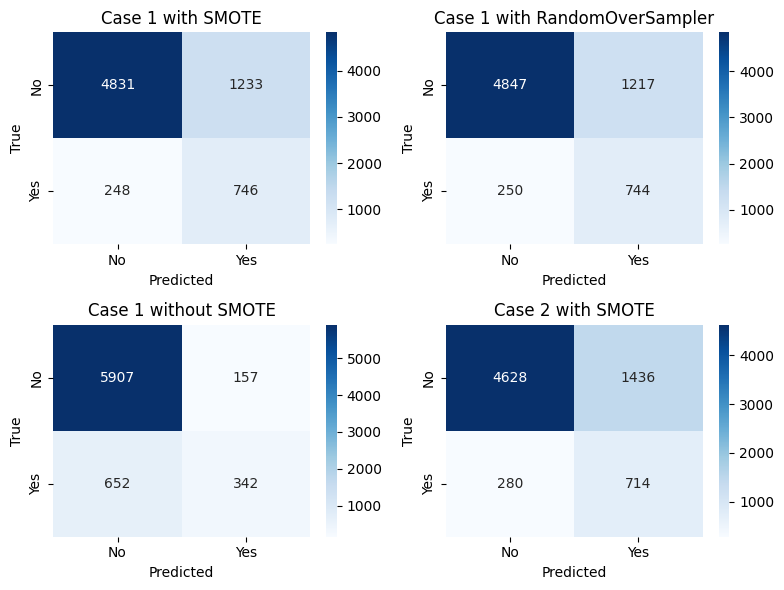

In [502]:
# Confusion matrix
cm_lg = confusion_matrix(y_test, y_pred_lg)
cm_lg_ros = confusion_matrix(y_test, y_pred_lg_ros)
cm_lg_nos = confusion_matrix(y_test, y_pred_lg_nos)
cm_lg_2 = confusion_matrix(y_test, y_pred_lg_2)

# Plotting
plt.figure(figsize=(8, 6)) 

# Logistic Regression
plt.subplot(2, 2, 1)
sns.heatmap(cm_lg, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Case 1 with SMOTE')
plt.xlabel('Predicted')
plt.ylabel('True')

# Random Forest
plt.subplot(2, 2, 2)
sns.heatmap(cm_lg_ros, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Case 1 with RandomOverSampler')
plt.xlabel('Predicted')
plt.ylabel('True')

# KNN
plt.subplot(2, 2, 3)
sns.heatmap(cm_lg_nos, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Case 1 without SMOTE')
plt.xlabel('Predicted')
plt.ylabel('True')

# XGBoost
plt.subplot(2, 2, 4)
sns.heatmap(cm_lg_2, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Case 2 with SMOTE')
plt.xlabel('Predicted')
plt.ylabel('True')


plt.tight_layout()
plt.show()

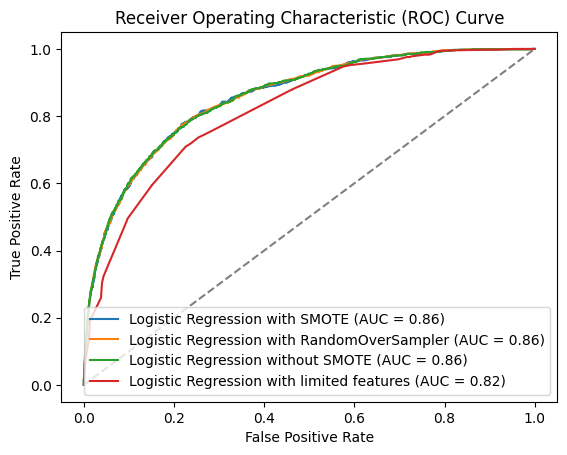

In [501]:
# ROC curve comparison for Logistic regression different cases.
# Calculate and plot ROC curve for case 1 with SMOTE
fpr_lg, tpr_lg, _ = roc_curve(y_test, pipeline_model_lg.predict_proba(X_test)[:, 1], pos_label=1)
roc_lg = RocCurveDisplay(fpr=fpr_lg, tpr=tpr_lg)
roc_auc_lg = auc(fpr_lg, tpr_lg)
roc_lg.plot(ax=plt.gca(), name=f'Logistic Regression with SMOTE (AUC = {roc_auc_lg:.2f})')

# Calculate and plot ROC curve for case 1 with RandomOverSampler
fpr_lg_ros, tpr_lg_ros, _ = roc_curve(y_test, pipeline_model_lg_ros.predict_proba(X_test)[:, 1], pos_label=1)
roc_lg_ros = RocCurveDisplay(fpr=fpr_lg_ros, tpr=tpr_lg_ros)
roc_auc_lg_ros = auc(fpr_lg_ros, tpr_lg_ros)
roc_lg_ros.plot(ax=plt.gca(), name=f'Logistic Regression with RandomOverSampler (AUC = {roc_auc_lg_ros:.2f})')

# Calculate and plot ROC curve for case 1 without resampling
fpr_lg_nos, tpr_lg_nos, _ = roc_curve(y_test, pipeline_model_lg_nos.predict_proba(X_test)[:, 1], pos_label=1)
roc_lg_nos = RocCurveDisplay(fpr=fpr_lg_nos, tpr=tpr_lg_nos)
roc_auc_lg_nos = auc(fpr_lg_nos, tpr_lg_nos)
roc_lg_nos.plot(ax=plt.gca(), name=f'Logistic Regression without SMOTE (AUC = {roc_auc_lg_nos:.2f})')

# Calculate and plot ROC curve for case 2
fpr_lg_2, tpr_lg_2, _ = roc_curve(y_test, pipeline_model_lg_2.predict_proba(X_test)[:, 1], pos_label=1)
roc_lg_2 = RocCurveDisplay(fpr=fpr_lg_2, tpr=tpr_lg_2)
roc_auc_lg_2 = auc(fpr_lg_2, tpr_lg_2)
roc_lg_2.plot(ax=plt.gca(), name=f'Logistic Regression with limited features (AUC = {roc_auc_lg_2:.2f})')

# Plot the chance level (diagonal line)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Customize the plot further if needed
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Show the plot
plt.show()

In [463]:
# Check if the model is overfitting
# If the training accuracy is significantly higher than the test accuracy, it could be a sign of overfitting.

# Predictions on the training set
y_train_pred = pipeline_model_lg.predict(X_train)

# Predictions on the test set
y_test_pred = pipeline_model_lg.predict(X_test)

# Calculate accuracy on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.7882
Test Accuracy: 0.7905


### Findings
1. **Resampling vs without Resampling?** \
=> Resampling method improved the performance.

2. **SMOTE vs RandomOverSampler?** \
=> SMOTE got slightly better TP and FN

3. **Case 1 vs Case 2** \
=> Case 1 is better

### Conclusion
Case 1 with SMOTE is the method to apply for the rest of models.

[TOC](#toc)

<a id='model_comparison'/>

### Performance comparison for models

In [ ]:
# Random Forest
y_pred_rf = pipeline_model_rf.predict(X_test)
# Print accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf, pos_label=1))
print("precision", precision_score(y_test, y_pred_rf, pos_label=1))
print("-----"*10)

# KNN
y_pred_knn = pipeline_model_knn.predict(X_test)
# Print accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Recall:", recall_score(y_test, y_pred_knn, pos_label=1))
print("precision", precision_score(y_test, y_pred_knn, pos_label=1))
print("-----"*10)

#XGBoost

y_pred_xgb = pipeline_model_xgb.predict(X_test)
# Print accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb, pos_label=1))
print("precision", precision_score(y_test, y_pred_xgb, pos_label=1))
print("-----"*10)

Accuracy: 0.8299801643525078
Recall: 0.49295774647887325
precision 0.4131534569983137
--------------------------------------------------


In [523]:
# Error Rate
print('Error rate comparison')
print('-----'*10)
print("Baseline Model:      ", 1 - accuracy_score(y_test, y_pred_dummy))
print("Logistic Regression: ", 1 - accuracy_score(y_test, y_pred_lg))
print("Random Forest:       ", 1 - accuracy_score(y_test, y_pred_rf))
print("KNN:                 ", 1 - accuracy_score(y_test, y_pred_knn))
print("XGBoost:             ", 1 - accuracy_score(y_test, y_pred_xgb))

Error rate comparison
--------------------------------------------------
Baseline Model:       0.2442618305468971
Logistic Regression:  0.20983281382828
Random Forest:        0.17001983564749223
KNN:                  0.20303202040238033
XGBoost:              0.1256729951827713


In [524]:
# precision
# TP / (TP + FP) - The ability of the classifier not to label as positive a sample that is negative.
print('Precision comparison')
print('-----'*10)
print("Baseline Model:      ", precision_score(y_test, y_pred_dummy))
print("Logistic Regression: ", precision_score(y_test, y_pred_lg))
print("Random Forest:       ", precision_score(y_test, y_pred_rf))
print("KNN:                 ", precision_score(y_test, y_pred_knn))
print("XGBoost:             ", precision_score(y_test, y_pred_xgb))



Precision comparison
--------------------------------------------------
Baseline Model:       0.12830957230142567
Logistic Regression:  0.37695805962607376
Random Forest:        0.4131534569983137
KNN:                  0.37141183362624486
XGBoost:              0.5624270711785297


In [ ]:
# reacll
# TP / (TP + FN) - The ability of the classifier to find all the positive samples.
print('Recall comparison')
print('-----'*10)
print("Baseline Model:      ", recall_score(y_test, y_pred_dummy))
print("Logistic Regression: ", recall_score(y_test, y_pred_lg))
print("Random Forest:       ", recall_score(y_test, y_pred_rf))
print("KNN:                 ", recall_score(y_test, y_pred_knn))
print("XGBoost:             ", recall_score(y_test, y_pred_xgb))

Recall comparison
--------------------------------------------------
Baseline Model:       0.1267605633802817
Logistic Regression:  0.7505030181086519
Random Forest:        0.49295774647887325
KNN:                  0.6378269617706237
XGBoost:              0.48490945674044267


In [519]:
# precision
print('f1score comparison')
print('-----'*10)
print("Baseline Model:      ", f1_score(y_test, y_pred_dummy))
print("Logistic Regression: ", f1_score(y_test, y_pred_lg))
print("Random Forest:       ", f1_score(y_test, y_pred_rf))
print("KNN:                 ", f1_score(y_test, y_pred_knn))
print("XGBoost:             ", f1_score(y_test, y_pred_xgb))

f1score comparison
--------------------------------------------------
Baseline Model:       0.12753036437246965
Logistic Regression:  0.501849983181971
Random Forest:        0.4495412844036697
KNN:                  0.4694557571269899
XGBoost:              0.5207995678011885


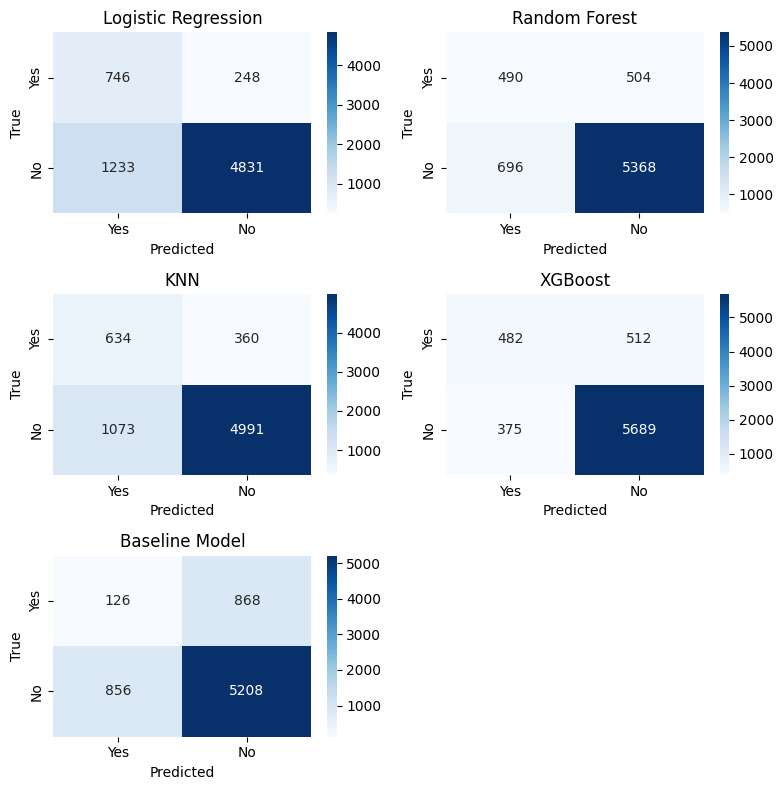

In [521]:
# Change "1(Yes)" to be the positive class
positive_class = 1

# Confusion matrix
cm_lg = confusion_matrix(y_test, y_pred_lg, labels=[positive_class, 0])
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=[positive_class, 0])
cm_knn = confusion_matrix(y_test, y_pred_knn, labels=[positive_class, 0])
cm_xgb = confusion_matrix(y_test, y_pred_xgb, labels=[positive_class, 0])
cm_dummy = confusion_matrix(y_test, y_pred_dummy, labels=[positive_class, 0])

# Plotting
plt.figure(figsize=(8, 8)) 

# Logistic Regression
plt.subplot(3, 2, 1)
sns.heatmap(cm_lg, annot=True, fmt='d', cmap='Blues', xticklabels=['Yes', 'No'], yticklabels=['Yes', 'No'])
plt.title('Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')

# Random Forest
plt.subplot(3, 2, 2)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Yes', 'No'], yticklabels=['Yes', 'No'])
plt.title('Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')

# KNN
plt.subplot(3, 2, 3)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Yes', 'No'], yticklabels=['Yes', 'No'])
plt.title('KNN')
plt.xlabel('Predicted')
plt.ylabel('True')

# XGBoost
plt.subplot(3, 2, 4)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Yes', 'No'], yticklabels=['Yes', 'No'])
plt.title('XGBoost')
plt.xlabel('Predicted')
plt.ylabel('True')


# Baseline model
plt.subplot(3, 2, 5)
sns.heatmap(cm_dummy, annot=True, fmt='d', cmap='Blues', xticklabels=['Yes', 'No'], yticklabels=['Yes', 'No'])
plt.title('Baseline Model')
plt.xlabel('Predicted')
plt.ylabel('True')


plt.tight_layout()
plt.show()

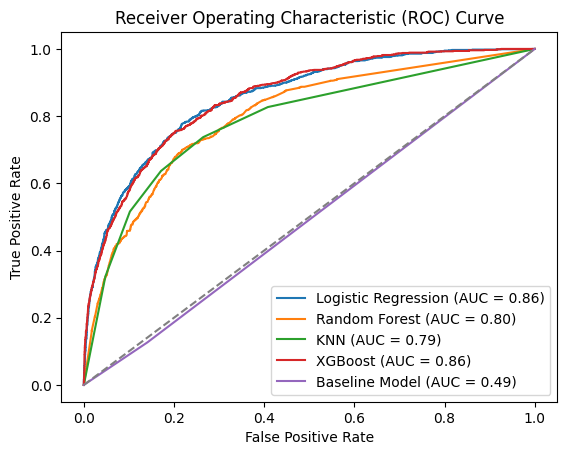

In [522]:
# Calculate and plot ROC curve for Logistic regression
fpr_lg, tpr_lg, _ = roc_curve(y_test, pipeline_model_lg.predict_proba(X_test)[:, 1], pos_label=1)
roc_lg = RocCurveDisplay(fpr=fpr_lg, tpr=tpr_lg)
roc_auc_lg = auc(fpr_lg, tpr_lg)
roc_lg.plot(ax=plt.gca(), name=f'Logistic Regression (AUC = {roc_auc_lg:.2f})')

# Calculate and plot ROC curve for Random forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, pipeline_model_rf.predict_proba(X_test)[:, 1], pos_label=1)
roc_rf = RocCurveDisplay(fpr=fpr_rf, tpr=tpr_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_rf.plot(ax=plt.gca(), name=f'Random Forest (AUC = {roc_auc_rf:.2f})')

# Calculate and plot ROC curve for KNN
fpr_knn, tpr_knn, _ = roc_curve(y_test, pipeline_model_knn.predict_proba(X_test)[:, 1], pos_label=1)
roc_knn = RocCurveDisplay(fpr=fpr_knn, tpr=tpr_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)
roc_knn.plot(ax=plt.gca(), name=f'KNN (AUC = {roc_auc_knn:.2f})')

# Calculate and plot ROC curve for XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test_encoded, pipeline_model_xgb.predict_proba(X_test)[:, 1], pos_label=1)
roc_xgb = RocCurveDisplay(fpr=fpr_xgb, tpr=tpr_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
roc_xgb.plot(ax=plt.gca(), name=f'XGBoost (AUC = {roc_auc_xgb:.2f})')

# Calculate and plot ROC curve for baseline model
fpr_dummy, tpr_dummy, _ = roc_curve(y_test, dummy.predict_proba(X_test)[:, 1], pos_label=1)
roc_dummy = RocCurveDisplay(fpr=fpr_dummy, tpr=tpr_dummy)
roc_auc_dummy = auc(fpr_dummy, tpr_dummy)
roc_dummy.plot(ax=plt.gca(), name=f'Baseline Model (AUC = {roc_auc_dummy:.2f})')

# Plot the chance level (diagonal line)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Customize the plot further if needed
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Show the plot
plt.show()

<a id='cross_validation'/>

# Cross Validation
[TOC](#toc)

In [527]:
# Perform cross-validation with 5 folds
cv_scores_lg = cross_val_score(pipeline_model_lg, X_train, y_train, cv=5, scoring='roc_auc')
cv_scores_rf = cross_val_score(pipeline_model_rf, X_train, y_train, cv=5, scoring='roc_auc')
cv_scores_knn = cross_val_score(pipeline_model_knn, X_train, y_train, cv=5, scoring='roc_auc')
cv_scores_xgb = cross_val_score(pipeline_model_xgb, X_train, y_train, cv=5, scoring='roc_auc')

# Calculate and print the mean roc_auc
mean_roc_auc_lg = cv_scores_lg.mean()
mean_roc_auc_rf = cv_scores_rf.mean()
mean_roc_auc_knn = cv_scores_knn.mean()
mean_roc_auc_xgb = cv_scores_xgb.mean()

# Print the cross-validation scores and the mean roc_auc
# Logistic Regression
print("Logistic Regression")
print("Cross-validation scores:", cv_scores_lg)
print("Mean roc auc:", mean_roc_auc_lg)
print("-----"*10)
# Random Forest
print("Random Forest")
print("Cross-validation scores:", cv_scores_rf)
print("Mean roc auc:", mean_roc_auc_rf)
print("-----"*10)
# KNN
print("KNN")
print("Cross-validation scores:", cv_scores_knn)
print("Mean roc auc:", mean_roc_auc_knn)
print("-----"*10)
# XGBoost
print("XGBoost")
print("Cross-validation scores:", cv_scores_xgb)
print("Mean roc auc:", mean_roc_auc_xgb)
print("-----"*10)

Logistic Regression
Cross-validation scores: [0.84741151 0.86104069 0.83153042 0.84375876 0.85723906]
Mean roc auc: 0.8481960885878452
--------------------------------------------------
Random Forest
Cross-validation scores: [0.79382349 0.81366644 0.79158202 0.79185331 0.80984584]
Mean roc auc: 0.800154219193607
--------------------------------------------------
KNN
Cross-validation scores: [0.78377033 0.79980043 0.77858184 0.7729348  0.8081927 ]
Mean roc auc: 0.7886560200095014
--------------------------------------------------
XGBoost
Cross-validation scores: [0.84027507 0.86112235 0.83740241 0.82668536 0.85105694]
Mean roc auc: 0.8433084253506784
--------------------------------------------------


In [531]:
# Accuracy
# Perform cross-validation with 5 folds
cv_accuracy_lg = cross_val_score(pipeline_model_lg, X_train, y_train, cv=5, scoring='accuracy')
cv_accuracy_rf = cross_val_score(pipeline_model_rf, X_train, y_train, cv=5, scoring='accuracy')
cv_accuracy_knn = cross_val_score(pipeline_model_knn, X_train, y_train, cv=5, scoring='accuracy')
cv_accuracy_xgb = cross_val_score(pipeline_model_xgb, X_train, y_train, cv=5, scoring='accuracy')

# Calculate and print the mean roc_auc
mean_accuracy_lg = cv_accuracy_lg.mean()
mean_accuracy_rf = cv_accuracy_rf.mean()
mean_accuracy_knn = cv_accuracy_knn.mean()
mean_accuracy_xgb = cv_accuracy_xgb.mean()

# Print the cross-validation scores and the mean roc_auc
# Logistic Regression
print("Logistic Regression")
print("Cross-validation scores:", cv_accuracy_lg)
print("Mean accuracy:", mean_accuracy_lg)
print("-------"*10)
# Random Forest
print("Random Forest")
print("Cross-validation scores:", cv_accuracy_rf)
print("Mean accuracy:", mean_accuracy_rf)
print("-------"*10)
# KNN
print("KNN")
print("Cross-validation scores:", cv_accuracy_knn)
print("Mean accuracy:", mean_accuracy_knn)
print("-------"*10)
# XGBoost
print("XGBoost")
print("Cross-validation scores:", cv_accuracy_xgb)
print("Mean accuracy:", mean_accuracy_xgb)
print("-------"*10)

Logistic Regression
Cross-validation scores: [0.78961749 0.78894625 0.79744913 0.7871242  0.78773155]
Mean accuracy: 0.7901737250236052
--------------------------------------------------
Random Forest
Cross-validation scores: [0.82058288 0.83844519 0.83449742 0.8335864  0.83480109]
Mean accuracy: 0.832382594419802
--------------------------------------------------
KNN
Cross-validation scores: [0.79538555 0.79289402 0.80078955 0.80200425 0.80109323]
Mean accuracy: 0.7984333200395091
--------------------------------------------------
XGBoost
Cross-validation scores: [0.87128112 0.87670817 0.87761919 0.86759794 0.87761919]
Mean accuracy: 0.874165121098258
--------------------------------------------------


In [559]:
# Perform cross-validation with 5 folds
cv_f1_lg = cross_val_score(pipeline_model_lg, X_train, y_train, cv=5, scoring='f1')
cv_f1_rf = cross_val_score(pipeline_model_rf, X_train, y_train, cv=5, scoring='f1')
cv_f1_knn = cross_val_score(pipeline_model_knn, X_train, y_train, cv=5, scoring='f1')
cv_f1_xgb = cross_val_score(pipeline_model_xgb, X_train, y_train, cv=5, scoring='f1')

# Calculate and print the mean roc_auc
mean_f1_lg = cv_f1_lg.mean()
mean_f1_rf = cv_f1_rf.mean()
mean_f1_knn = cv_f1_knn.mean()
mean_f1_xgb = cv_f1_xgb.mean()

# Print the cross-validation scores and the mean roc_auc
# Logistic Regression
print("Logistic Regression")
print("Cross-validation scores:", cv_f1_lg)
print("Mean f1score:", mean_f1_lg)
print("-------"*10)
# Random Forest
print("Random Forest")
print("Cross-validation scores:", cv_f1_rf)
print("Mean f1score:", mean_f1_rf)
print("-------"*10)
# KNN
print("KNN")
print("Cross-validation scores:", cv_f1_knn)
print("Mean f1score:", mean_f1_knn)
print("-------"*10)
# XGBoost
print("XGBoost")
print("Cross-validation scores:", cv_f1_xgb)
print("Mean f1score:", mean_f1_xgb)
print("-------"*10)

Logistic Regression
Cross-validation scores: [0.496      0.50179211 0.48810437 0.49092229 0.50809289]
Mean f1score: 0.49698233527777746
----------------------------------------------------------------------
Random Forest
Cross-validation scores: [0.40714995 0.46214356 0.43897436 0.42579324 0.46918489]
Mean f1score: 0.4406492008186178
----------------------------------------------------------------------
KNN
Cross-validation scores: [0.45469256 0.46635368 0.45058626 0.45757072 0.48139351]
Mean f1score: 0.4621193443816374
----------------------------------------------------------------------
XGBoost
Cross-validation scores: [0.50351288 0.52347418 0.50673195 0.48826291 0.52643948]
Mean f1score: 0.5096842797739184
----------------------------------------------------------------------


### Findings
Both Logistic regression and XGBoost have mean AUC 0.84.
XGBoost got better accuracy, f1score compare to Logistic Regression.

### Conclusion
XGBoost got the best performance among the models

<a id='gridsearch' />

# Grid Search for the selected  model
[TOC](#toc)

In [402]:
pipeline_model_xgb.get_params()

{'memory': None,
 'steps': [('ct',
   ColumnTransformer(transformers=[('num_processor',
                                    Pipeline(steps=[('num_scaler',
                                                     StandardScaler())]),
                                    ['year', 'age']),
                                   ('cat_processor',
                                    Pipeline(steps=[('ohe', OneHotEncoder())]),
                                    ['country', 'location_type', 'cellphone',
                                     'gender', 'relationship_with_head',
                                     'education_level', 'job_type'])])),
  ('smote', SMOTE(random_state=42)),
  ('model',
   XGBClassifier(base_score=None, booster=None, callbacks=None,
                 colsample_bylevel=None, colsample_bynode=None,
                 colsample_bytree=None, early_stopping_rounds=None,
                 enable_categorical=False, eval_metric=None, feature_types=None,
                 gamma=None, gpu_i

In [419]:
# Define the hyperparameter grid to search
params_dict_xgb = {
                    'model__learning_rate': [0.01, 0.1, 0.2],
                    'model__n_estimators': [100, 200, 300],
                    'model__max_depth': [3, 4, 5],
                    # 'model__min_child_weight': [1, 2, 3],
                    'model__subsample': [0.8, 0.9, 1.0],
                    'model__colsample_bytree': [0.8, 0.9, 1.0],
                    # 'model__gamma': [0, 0.1, 0.2],
                    # 'model__scale_pos_weight': [1, 2, 3]
                   }

gridsearch_xgb = GridSearchCV(pipeline_model_xgb, 
                              params_dict_xgb, 
                              scoring='accuracy', 
                              cv=5, 
                              n_jobs=-1
                              )

gridsearch_xgb

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(transformers=[('num_processor',
                                                                         Pipeline(steps=[('num_scaler',
                                                                                          StandardScaler())]),
                                                                         ['year',
                                                                          'age']),
                                                                        ('cat_processor',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder())]),
                                                                         ['country',
                                                                          'location_type',
                                                                          'cellphone',
                                                                          'gender',
                                                                          'relationship_with_head',
                                                                          'education_level',
                                                                          'job_type'])])),
                                       ('smote', SMOTE(rand...
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'model__colsample_bytree': [0.8, 0.9, 1.0],
                         'model__learning_rate': [0.01, 0.1, 0.2],
                         'model__max_depth': [3, 4, 5],
                         'model__n_estimators': [100, 200, 300],
                         'model__subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy')

In [420]:
# Fit the grid search to the data
gridsearch_xgb.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", gridsearch_xgb.best_params_)

# Get the best model from the grid search
best_xgb = gridsearch_xgb.best_estimator_
best_xgb.fit(X_train, y_train)

# Make predictions on the test set
y_pred_best_xgb = best_xgb.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred_best_xgb)
print("Accuracy:", accuracy)

/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hiroi/spiced_work/Financial_Inclusion_in_Africa_1/.venv/lib/python3.11/site-packages/sklearn/base.py:348: Inc

Best Hyperparameters: {'model__colsample_bytree': 1.0, 'model__learning_rate': 0.2, 'model__max_depth': 4, 'model__n_estimators': 300, 'model__subsample': 1.0}
Accuracy: 0.8753187871918391


In [421]:
# Inspect model performance
y_pred_xgb_best = best_xgb.predict(X_test)

# Additional metrics
print("Before tuning")
print(classification_report(y_test, y_pred_xgb))
print("------"*10)
print("After tuning")
print(classification_report(y_test, y_pred_xgb_best))

Before tuning
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      6064
           1       0.56      0.48      0.52       994

    accuracy                           0.87      7058
   macro avg       0.74      0.71      0.72      7058
weighted avg       0.87      0.87      0.87      7058

------------------------------------------------------------
After tuning
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      6064
           1       0.57      0.47      0.52       994

    accuracy                           0.88      7058
   macro avg       0.74      0.71      0.72      7058
weighted avg       0.87      0.88      0.87      7058



In [553]:
# Perform cross-validation with 5 folds
cv_scores_xgb = cross_val_score(pipeline_model_xgb, X_train, y_train, cv=5, scoring='roc_auc')
cv_scores_xgb_best = cross_val_score(best_xgb, X_train, y_train, cv=5, scoring='roc_auc')

# Calculate and print the mean roc_au
mean_roc_auc_xgb = cv_scores_xgb.mean()
mean_roc_auc_xgb_best = cv_scores_xgb_best.mean()

# Print the cross-validation scores and the mean roc_auc
# Before tuning
print("XGBoost: Before tuning")
print("Cross-validation scores:", cv_scores_xgb)
print("Mean roc auc:", mean_roc_auc_xgb)
print("-----"*10)

# After tuning
print("XGBoost: After tuning")
print("Cross-validation scores:", cv_scores_xgb_best)
print("Mean roc auc:", mean_roc_auc_xgb_best)
print("-----"*10)

XGBoost: Before tuning
Cross-validation scores: [0.84027507 0.86112235 0.83740241 0.82668536 0.85105694]
Mean roc auc: 0.8433084253506784
--------------------------------------------------
XGBoost: After tuning
Cross-validation scores: [0.84811594 0.86033855 0.83727915 0.83255285 0.85304528]
Mean roc auc: 0.8462663542756259
--------------------------------------------------


In [557]:
# Perform cross-validation with 5 folds
cv_accuracy_xgb_best = cross_val_score(best_xgb, X_train, y_train, cv=5, scoring='accuracy')

# Calculate and print the mean accuracy
mean_accuracy_xgb_best = cv_accuracy_xgb_best.mean()

# Print the cross-validation scores and the mean accuracy
# Before tuning
print("XGBoost: Before tuning")
print("Cross-validation scores:", cv_accuracy_xgb)
print("Mean accuracy:", mean_accuracy_xgb)
print("-----"*10)

# After tuning
print("XGBoost: After tuning")
print("Cross-validation scores:", cv_accuracy_xgb_best)
print("Mean accuracy:", mean_accuracy_xgb_best)
print("-----"*10)

XGBoost: Before tuning
Cross-validation scores: [0.87128112 0.87670817 0.87761919 0.86759794 0.87761919]
Mean accuracy: 0.874165121098258
--------------------------------------------------
XGBoost: After tuning
Cross-validation scores: [0.87765634 0.87883389 0.88612208 0.87184938 0.87701184]
Mean accuracy: 0.8782947065687902
--------------------------------------------------


In [561]:
# Perform cross-validation with 5 folds
cv_f1_xgb_best = cross_val_score(best_xgb, X_train, y_train, cv=5, scoring='f1')

# Calculate and print the mean f1
mean_f1_xgb_best = cv_f1_xgb_best.mean()

# Print the cross-validation scores and the mean accuracy
# Before tuning
print("XGBoost: Before tuning")
print("Cross-validation scores:", cv_f1_xgb)
print("Mean f1score:", mean_f1_xgb)
print("-----"*10)

# After tuning
print("XGBoost: After tuning")
print("Cross-validation scores:", cv_f1_xgb_best)
print("Mean f1score:", mean_f1_xgb_best)
print("-----"*10)

XGBoost: Before tuning
Cross-validation scores: [0.50351288 0.52347418 0.50673195 0.48826291 0.52643948]
Mean f1score: 0.5096842797739184
--------------------------------------------------
XGBoost: After tuning
Cross-validation scores: [0.51269649 0.51869723 0.51984635 0.48410758 0.51843044]
Mean f1score: 0.5107556178338484
--------------------------------------------------


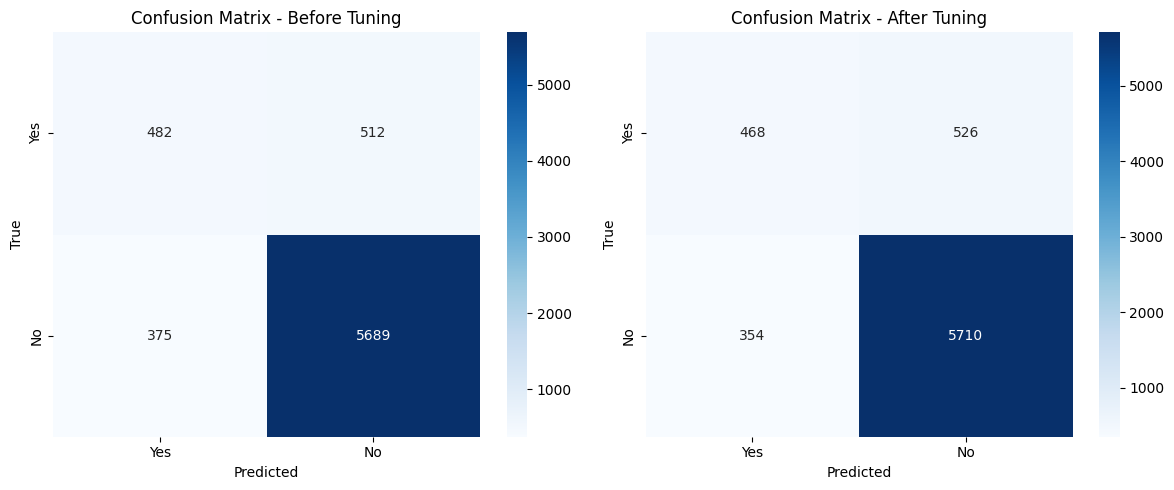

In [562]:
# Confusion matrix
cm_before_tuning_xgb = confusion_matrix(y_test, y_pred_xgb, labels=[positive_class, 0])
cm_after_tuning_xgb = confusion_matrix(y_test, y_pred_xgb_best, labels=[positive_class, 0])

# Plotting
plt.figure(figsize=(12, 5)) 

plt.subplot(1, 2, 1)
# Plot confusion matrix before tuning
sns.heatmap(cm_before_tuning_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Yes', 'No'], yticklabels=['Yes', 'No'])
plt.title('Confusion Matrix - Before Tuning')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(1, 2, 2)
# Plot confusion matrix after tuning
sns.heatmap(cm_after_tuning_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Yes', 'No'], yticklabels=['Yes', 'No'])
plt.title('Confusion Matrix - After Tuning')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()

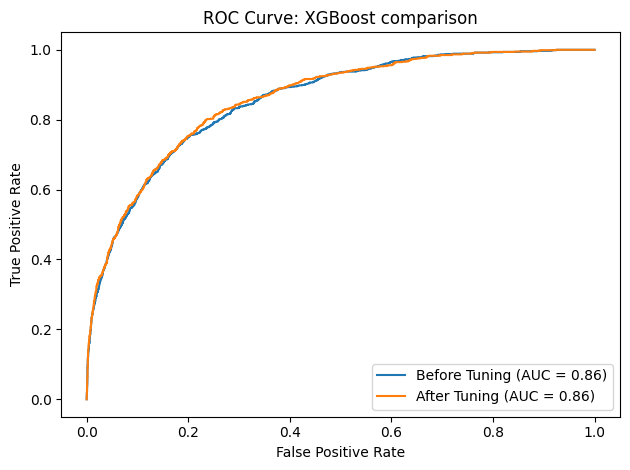

In [563]:
# ROC curve
fpr_xgb_before, tpr_xgb_before, _ = roc_curve(y_test, pipeline_model_xgb.predict_proba(X_test)[:, 1], pos_label=1)
roc_xgb_before = RocCurveDisplay(fpr=fpr_xgb_before, tpr=tpr_xgb_before)
roc_auc_xgb_before = auc(fpr_xgb_before, tpr_xgb_before)
roc_xgb_before.plot(ax=plt.gca(), name=f'Before Tuning (AUC = {roc_auc_xgb_before:.2f})')

fpr_xgb_after, tpr_xgb_after, _ = roc_curve(y_test, best_xgb.predict_proba(X_test)[:, 1], pos_label=1)
roc_xgb_after = RocCurveDisplay(fpr=fpr_xgb_after, tpr=tpr_xgb_after)
roc_auc_xgb_after = auc(fpr_xgb_after, tpr_xgb_after)
roc_xgb_after.plot(ax=plt.gca(), name=f'After Tuning (AUC = {roc_auc_xgb_after:.2f})')

# Plot ROC curves
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: XGBoost comparison')
plt.legend()

plt.tight_layout()
plt.show()

After the gridsearch, the performance got slightly better.
* Mean roc auc 84% to 85%
* Mean accuracy: 87% to 88%
* Mean f1score: 51% remains 51%

[TOC](#toc)